In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_csv('bw1train.csv')
df1.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [3]:
df2=pd.read_csv('bw1test.csv')
df2.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN


In [4]:
df1.drop("indicator_code",axis=1,inplace=True)
df1.drop("hedge_value",axis=1,inplace=True)
df1.drop("status",axis=1,inplace=True)
df1.drop("desk_id",axis=1,inplace=True)
df1.drop("portfolio_id",axis=1,inplace=True)
df1.drop("currency",axis=1,inplace=True)

In [5]:
df1.head()

,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,sell_date,type,return
0,OFF00001002,B,20040720,110000000.0,T,0.02074,2.332216,1.098097e+08,20040720,20040812,B,0.02496
1,OFF00001001,A,20040709,176671000.0,N,0.02074,5.269617,1.760084e+08,20040723,20040812,C,0.05496
2,OFF00001001,A,20040723,56474000.0,T,0.02074,2.332216,5.637953e+07,20040723,20040817,A,0.02496
3,OFF00001001,A,20040609,164813000.0,T,0.02074,2.332216,1.645088e+08,20040723,20040713,A,0.02496
4,OFF00001002,B,20040609,140800000.0,T,0.02074,2.332216,1.405402e+08,20040723,20040713,B,0.02496


In [6]:
df1.drop("office_id",axis=1,inplace=True)

In [7]:
df1.head()

,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,sell_date,type,return
0,B,20040720,110000000.0,T,0.02074,2.332216,1.098097e+08,20040720,20040812,B,0.02496
1,A,20040709,176671000.0,N,0.02074,5.269617,1.760084e+08,20040723,20040812,C,0.05496
2,A,20040723,56474000.0,T,0.02074,2.332216,5.637953e+07,20040723,20040817,A,0.02496
3,A,20040609,164813000.0,T,0.02074,2.332216,1.645088e+08,20040723,20040713,A,0.02496
4,B,20040609,140800000.0,T,0.02074,2.332216,1.405402e+08,20040723,20040713,B,0.02496


In [8]:
df1=df1[(df1["pf_category"] == "B") | (df1["pf_category"] == "A") | (df1["pf_category"] == "C") | (df1["pf_category"] == "D") | (df1["pf_category"] == "E")]

mapping_dictionary = {"pf_category":{ "A": 1, "B": 2, "C": 3, "D": 4, "E": 5}}
df1 = df1.replace(mapping_dictionary)

In [9]:
df1=df1[(df1["country_code"] == "T") | (df1["country_code"] == "N") | (df1["country_code"] == "Z") | (df1["country_code"] == "M") | (df1["country_code"] == "U")]

mapping_dictionary = {"country_code":{ "T": 1, "N": 2, "Z": 3, "M": 4, "U": 5}}
df1 = df1.replace(mapping_dictionary)

In [10]:
print(df1['pf_category'].unique(),"\n")
print(df1['country_code'].unique(),"\n")
print(df1['type'].unique(),"\n")

[2 1 3 4 5] 

[1 2 4 3 5] 

['B' 'C' 'A' 'D' 'E' 'F' 'G' 'H'] 



In [11]:
df1['pf_category'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [12]:
df1['country_code'].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [13]:
df1.head()

,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,sell_date,type,return
0,2,20040720,110000000.0,1,0.02074,2.332216,1.098097e+08,20040720,20040812,B,0.02496
1,1,20040709,176671000.0,2,0.02074,5.269617,1.760084e+08,20040723,20040812,C,0.05496
2,1,20040723,56474000.0,1,0.02074,2.332216,5.637953e+07,20040723,20040817,A,0.02496
3,1,20040609,164813000.0,1,0.02074,2.332216,1.645088e+08,20040723,20040713,A,0.02496
4,2,20040609,140800000.0,1,0.02074,2.332216,1.405402e+08,20040723,20040713,B,0.02496


In [14]:
df1=df1[(df1["type"] == "A") | (df1["type"] == "B") | (df1["type"] == "C") | (df1["type"] == "D") | (df1["type"] == "E") | (df1["type"] == "F") | (df1["type"] == "G") | (df1["type"] == "H")]

mapping_dictionary2 = {"type":{ "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8}}
df1 = df1.replace(mapping_dictionary2)

In [15]:
df1['country_code'].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [16]:
df1['type'].unique()

array([2, 3, 1, 4, 5, 6, 7, 8], dtype=int64)

In [17]:
df1['pf_category'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [18]:
df1.isnull().any()

pf_category      False
start_date       False
sold              True
country_code     False
euribor_rate     False
libor_rate        True
bought            True
creation_date    False
sell_date        False
type             False
return           False
dtype: bool

In [19]:
print(df1['bought'].ix[1])
print(df1['bought'].ix[573])

176008436.734
nan


C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [20]:
for i in df1.columns:     #df.columns[w:] if you have w column of line description 
    df1[i] = df1[i].fillna(df1[i].median() )

In [21]:
print(df1['bought'].ix[1])
print(df1['bought'].ix[573])

176008436.734
55120560.5292


C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [22]:
df1.isnull().any()

pf_category      False
start_date       False
sold             False
country_code     False
euribor_rate     False
libor_rate       False
bought           False
creation_date    False
sell_date        False
type             False
return           False
dtype: bool

In [23]:
df1.head()

,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,sell_date,type,return
0,2,20040720,110000000.0,1,0.02074,2.332216,1.098097e+08,20040720,20040812,2,0.02496
1,1,20040709,176671000.0,2,0.02074,5.269617,1.760084e+08,20040723,20040812,3,0.05496
2,1,20040723,56474000.0,1,0.02074,2.332216,5.637953e+07,20040723,20040817,1,0.02496
3,1,20040609,164813000.0,1,0.02074,2.332216,1.645088e+08,20040723,20040713,1,0.02496
4,2,20040609,140800000.0,1,0.02074,2.332216,1.405402e+08,20040723,20040713,2,0.02496


In [93]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10000)
X=df1.drop('return',axis=1)
y=df1[['return']]

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [95]:
rf.fit(X_train,y_train)

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
pred=rf.predict(X_test)

In [97]:
rf.score(X_test,y_test)

0.59889601629725542

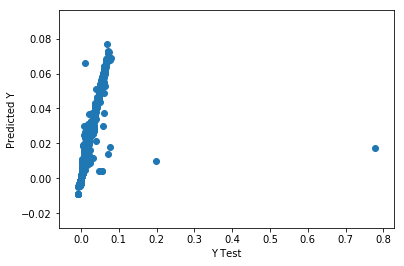

In [99]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [100]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0010940094587
MSE: 0.000228157718827
RMSE: 0.0151048905599
